In [1]:
# Packages needed for Neural Network
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

## Loading in the Images

In [2]:
# Creating a train generator
# Will use this for my first simple model
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = .2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )

Found 1832 images belonging to 2 classes.


In [3]:
# Creating a validation generator
# Will use this for my first simple model
validation_generator = train_datagen.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'binary',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )

Found 456 images belonging to 2 classes.


In [4]:
# Creating a test generator
test_dir = '\\Users\\somdd\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\test\\test'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    shuffle = False)                                                 

Found 980 images belonging to 2 classes.


In [5]:
train_generator.image_shape

(224, 224, 3)

## Taking a look at the images

In [6]:
# Looking at the counts for each label to make sure they are balanced in the train set
meat_labels = train_generator.classes
meat_label, meat_count = np.unique(meat_labels, return_counts=True)
print('Meat Quality {}'.format(list(zip(meat_label, meat_count))))

Meat Quality [(0, 916), (1, 916)]


In [7]:
# Looking at the class names for the indices
train_generator.class_indices

{'fresh': 0, 'rotten': 1}

In [8]:
# Looking at the counts for each label to make sure they are balanced in the test set
test_meat_labels = test_generator.classes
test_meat_label, test_meat_count = np.unique(test_meat_labels, return_counts=True)
print('Meat Quality {}'.format(list(zip(test_meat_label, test_meat_count))))

Meat Quality [(0, 490), (1, 490)]


In [9]:
# Creating a function so I can pull up an image and its directory
def print_image(condition, index):
    # viable condition inputs are "R/rotten" and "F/fresh"
    image = os.listdir('\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train\\{}'.format(condition))[index]
    print(image)
    path = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train\\{}\\{}'.format(condition,image)
    print(path)
    plt.imshow(tf.keras.utils.load_img(path, target_size=(350, 750)))  

Rotten (1709).jpg
\Users\somdd\Documents\Flatiron\Phase_5\Hello-Fresh\train\train\rotten\Rotten (1709).jpg


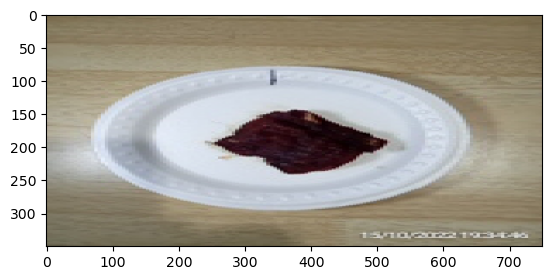

In [10]:
# Example of a rotten image
print_image('rotten', 30)

Fresh (100).jpg
\Users\somdd\Documents\Flatiron\Phase_5\Hello-Fresh\train\train\fresh\Fresh (100).jpg


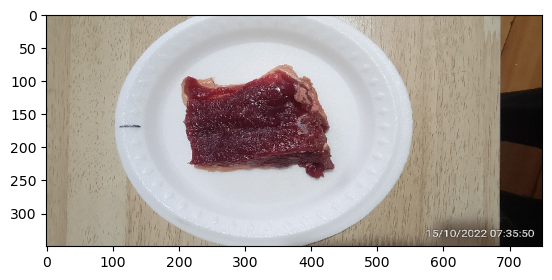

In [11]:
# Example of a fresh image
print_image('fresh', 1)

### Visualizing RGB Values for Fresh and Rotten Images

In [12]:
# To create an array with label and rgb values together
rgb, labels = train_generator.next()
zipped = list(zip(rgb,labels))

**If you run this different times it can change the order of "zipped" because it takes batches of 32 everytime.
This can lead to different visuals in distribution of rgb** 

In [13]:
# This will identify if the image is going to be fresh or rotten
# Fresh is 0.0
# Rotten is 1.0
print(zipped[0][1])
print(zipped[20][1])

1.0
0.0


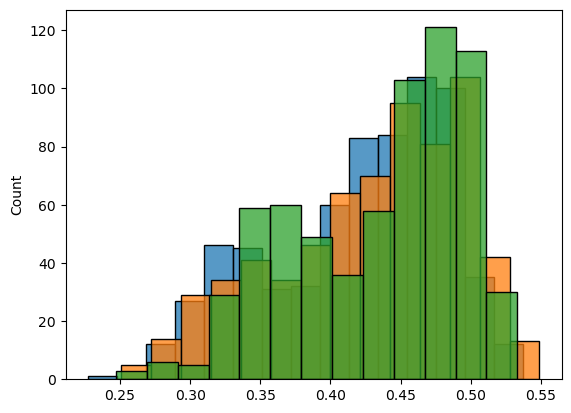

In [14]:
# Plotting the red, blue, and green values of the rotten image
sns.histplot(list(zipped[0][0][0].flatten()))
sns.histplot(list(zipped[0][0][1].flatten()))
sns.histplot(list(zipped[0][0][2].flatten()));

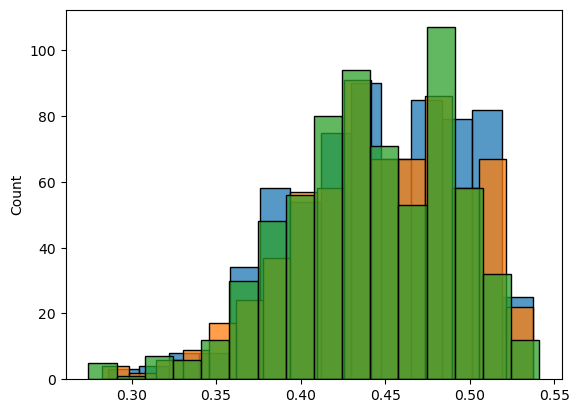

In [15]:
# Plotting the red, blue, and green values of the fresh image
sns.histplot(list(zipped[20][0][0].flatten()))
sns.histplot(list(zipped[20][0][1].flatten()))
sns.histplot(list(zipped[20][0][2].flatten()));

## Modeling

In [16]:
# Importing packages need for modeling
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

### FSM

In [17]:
# Building a first simple CNN
fsmodel = Sequential()
fsmodel.add(Conv2D(filters = 32, 
                   kernel_size = (4,4), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same'))
fsmodel.add(MaxPooling2D(pool_size = (2,2)))
fsmodel.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same'))
fsmodel.add(MaxPooling2D(pool_size = (2,2)))
fsmodel.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same'))
fsmodel.add(Flatten())
fsmodel.add(Dense(32, activation = 'relu'))
fsmodel.add(Dense(1, activation = 'sigmoid'))
#fsmodel.summary()

In [18]:
# Compiling the layer and fitting the model
fsmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
fsm_cnn = fsmodel.fit(train_generator, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator)

Epoch 1/20
20/20 [==============================] - 52s 3s/step - loss: 0.8774 - accuracy: 0.5344 - val_loss: 0.5892 - val_accuracy: 0.6206
Epoch 2/20
20/20 [==============================] - 51s 3s/step - loss: 0.3855 - accuracy: 0.8516 - val_loss: 0.2936 - val_accuracy: 0.8333
Epoch 3/20
20/20 [==============================] - 50s 3s/step - loss: 0.2502 - accuracy: 0.9109 - val_loss: 0.0503 - val_accuracy: 0.9978
Epoch 4/20
20/20 [==============================] - 50s 2s/step - loss: 0.1732 - accuracy: 0.9481 - val_loss: 0.1589 - val_accuracy: 0.9320
Epoch 5/20
20/20 [==============================] - 49s 2s/step - loss: 0.1101 - accuracy: 0.9692 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 52s 3s/step - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 48s 2s/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9978
Epoch 8/20
20/20 [==

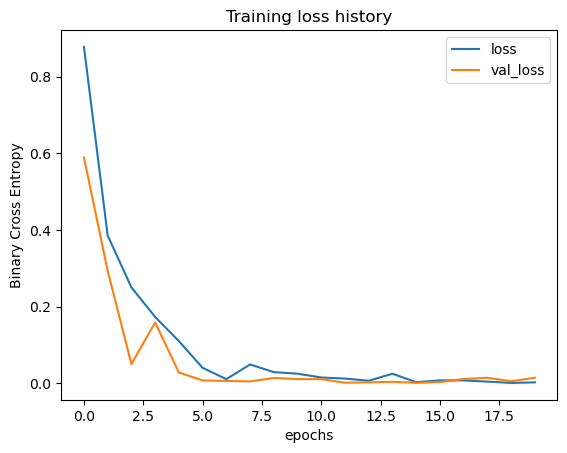

In [19]:
# Saving the model to a dataframe and plotting the loss history
fsm_cnn_df =  pd.DataFrame(fsm_cnn.history)
fsm_cnn_df.index.name = 'epochs'
col_list = ['loss', 'val_loss']
fsm_cnn_df[col_list].plot()
plt.ylabel('Binary Cross Entropy')
plt.title('Training loss history')
plt.show()

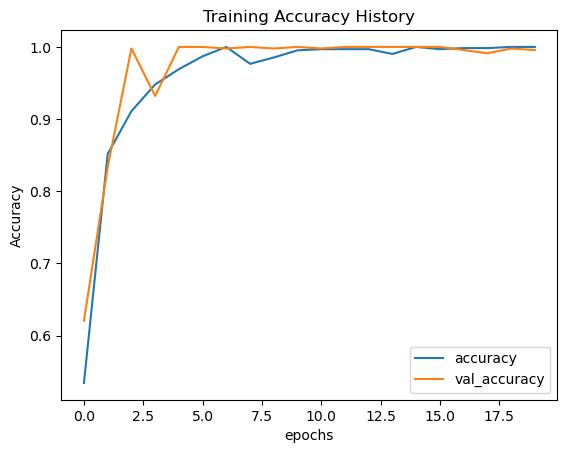

In [20]:
# Plotting the training accuracy
col_list = ['accuracy', 'val_accuracy']
fsm_cnn_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training Accuracy History')
plt.show()

In [21]:
# Evaluating the test accuracy and loss scores
test_loss, test_acc = fsmodel.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

31/31 [==============================] - 46s 1s/step - loss: 0.0325 - accuracy: 0.9908
Test loss: 0.032534822821617126 Test Acc: 0.9908163547515869


In [22]:
# Predicting the test values
y_proba_fsm = fsmodel.predict(test_generator) 

31/31 [==============================] - 43s 1s/step


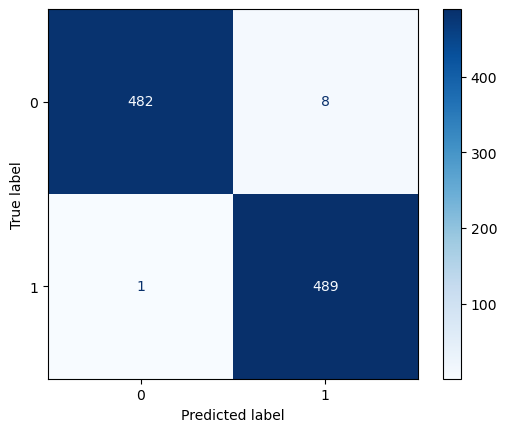

In [23]:
# Creating a confusion matrix to visualize how well my model predicts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_fsm = (y_proba_fsm > 0.5).astype('int')
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred_fsm)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Surprisingly, the FSM seems to run pretty well and makes few mistakes. However the train generator has no data augmetation, not many dense layers and no regularization. Something I will be adding in my second model**

In [25]:
# Saving the fsm
fsmodel.save('fsm.keras')

### Second Model

In [26]:
# Creating a new train generator with some data augmentation
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen_aug = ImageDataGenerator(rescale = 1./255, 
                                       horizontal_flip = True, 
                                       validation_split = .2)
train_generator_aug = train_datagen_aug.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )

Found 1832 images belonging to 2 classes.


In [27]:
# Creating a validation generator with some data augmentation
validation_generator_aug = train_datagen_aug.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'binary',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )

Found 456 images belonging to 2 classes.


In [28]:
# Second CNN
model2 = Sequential()
model2.add(Conv2D(filters = 32, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same', 
                 ))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                 ))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                ))

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the model
model2_history = model2.fit(train_generator_aug, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator_aug)

Epoch 1/20
20/20 [==============================] - 54s 3s/step - loss: 0.9023 - accuracy: 0.5453 - val_loss: 0.6725 - val_accuracy: 0.5504
Epoch 2/20
20/20 [==============================] - 52s 3s/step - loss: 0.6084 - accuracy: 0.6948 - val_loss: 0.4511 - val_accuracy: 0.8640
Epoch 3/20
20/20 [==============================] - 53s 3s/step - loss: 0.4004 - accuracy: 0.8500 - val_loss: 0.1916 - val_accuracy: 0.9561
Epoch 4/20
20/20 [==============================] - 52s 3s/step - loss: 0.1626 - accuracy: 0.9422 - val_loss: 0.0890 - val_accuracy: 0.9649
Epoch 5/20
20/20 [==============================] - ETA: 0s - loss: 0.1088 - accuracy: 0.9734

In [ ]:
# Saving the model to a dataframe and plotting training loss history
model2_df = pd.DataFrame(model2_history.history)
model2_df.index.name = 'epochs'
col_list = ['loss', 'val_loss']
model2_df[col_list].plot()
plt.ylabel('Binary Cross Entropy')
plt.title('Training Loss History')
plt.show()

In [ ]:
# plotting training accuracy history
col_list = ['accuracy', 'val_accuracy']
model2_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training Accuracy History')
plt.show()

In [ ]:
# Evaluting the model accuracy and loss on the test set
test_loss, test_acc = model2.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

In [ ]:
# Predicting the test values 
y_proba_2nd = model2.predict(test_generator) 

In [ ]:
# Creating a confusion matrix to visualize how well my model predicts
y_pred_2nd = (y_proba_2nd > 0.5).astype('int')
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred_2nd)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model seemed to run slightly better than the first giving zero loss

In [ ]:
model2.save('second_model.h5')

## Fourth Model

In [ ]:
# Creating a new train generator with more data augmentation
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen_aug3 = ImageDataGenerator(rescale = 1./255, 
                                       horizontal_flip = True,
                                       vertical_flip =  True,
                                       rotation_range = 20,
                                       validation_split = .2)
train_generator_aug3 = train_datagen_aug3.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )
# Creating a validation generator with data augmentation
validation_generator_aug3 = train_datagen_aug3.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'binary',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )                 

In [ ]:
model4 = Sequential()
model4.add(Conv2D(filters = 32, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same', 
                 ))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                 ))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                ))

model4.add(Flatten())
model4.add(Dense(256, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(128, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(32, activation = 'relu'))
model4.add(Dropout(0.25))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_4_history = model4.fit(train_generator_aug3, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator_aug3)

In [ ]:
core_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

for layer in core_model.layers:
    layer.trainable = False
 

In [ ]:
vggmodel = Sequential()
vggmodel.add(core_model)
vggmodel.add(Flatten())
vggmodel.add(Dense(64, activation = 'relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(Dense(1, activation = 'sigmoid'))

vggmodel.compile(optimizer= 'adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
vgg16_history = vggmodel.fit(train_generator_aug3, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator_aug3)

In [ ]:
core_model.summary()

In [ ]:
for layer in vggmodel.layers[0].layers[-3:-1]:
    layer.trainable = True

In [ ]:
vgg16_history_fine = vggmodel.fit(train_generator_aug3, epochs = 5, steps_per_epoch = 20, validation_data = validation_generator_aug3)

## Modeling with categorical crossentropy

In [ ]:
# Creating a new train generator with more data augmentation
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen_aug2 = ImageDataGenerator(rescale = 1./255, 
                                       horizontal_flip = True,
                                       vertical_flip =  True,
                                       rotation_range = 20,
                                       validation_split = .2)
train_generator_aug2 = train_datagen_aug2.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'categorical',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )
# Creating a validation generator with data augmentation
validation_generator_aug2 = train_datagen_aug2.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'categorical',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )
test_dir = '\\Users\\somdd\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\test\\test'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator_cat = test_datagen.flow_from_directory(test_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'categorical',
                                                    seed = 24,
                                                    shuffle = False)                                                 

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters = 32, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same', 
                 ))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                 ))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                ))

model3.add(Flatten())
model3.add(Dense(256, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(2, activation = 'softmax'))
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_3_history = model3.fit(train_generator_aug2, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator_aug2)

In [ ]:
model3_df = pd.DataFrame(model_3_history.history)
model3_df.index.name = 'epochs'
col_list = ['loss', 'val_loss']
model3_df[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

In [ ]:
col_list = ['accuracy', 'val_accuracy']
model3_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [ ]:
test_loss, test_acc = model3.evaluate(test_generator_cat)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

In [ ]:
y_pred = model3.predict(test_generator_cat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator_cat.classes

In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()